# 기계학습

### 담당교수 : 장원중

In [1]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [2]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

In [3]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
--python_version—
3.11.7


# 선형 변수 변환

# 최소최대 스케일링(Min-Max Scaling) with MinMaxScaler:수치형 변수의 선형변환 

## 2차원 배열 데이터 세트 

In [4]:
# 최소최대 스케일링 훈련용 데이터 생성 

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 훈련용 배열 데이터 생성 
X = np.array([[ 10, -10, 1], [ 5, 0, 2], [ 0, 10, 3]])
X

array([[ 10, -10,   1],
       [  5,   0,   2],
       [  0,  10,   3]])

In [5]:
# 최소최대 스케일링 : 0~1 변환 

X_MinMax = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_MinMax

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [6]:
# sklearn.preprocessing.MinMaxScaler() 이용한 최소최대 '0~1' 학습 
# - fit_transform() 함수를 이용해서 훈련 데이터를 학습한다. 

MinMax_scaler = MinMaxScaler()                   # 최소최대 모델 생성 
X_MinMax_train = MinMax_scaler.fit_transform(X)  # 훈련 데이터 학습 
X_MinMax_train

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [7]:
# 시험용 배열 데이터 생성
X_new = np.array([[9., -10., 1.], [5., -5., 3.], [1., 0., 5.]])
X_MinMax_new = MinMax_scaler.transform(X_new)  # 학습된 모델에 시험 데이터를 적용하여 변환시킴 
X_MinMax_new

array([[0.9 , 0.  , 0.  ],
       [0.5 , 0.25, 1.  ],
       [0.1 , 0.5 , 2.  ]])

In [8]:
# minmax_scale() 함수를 이용해 0~1 변수 변환 

from sklearn.preprocessing import minmax_scale 

X_MinMax_scaled = minmax_scale(X, axis=0, copy=True)
X_MinMax_scaled

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

## 아이리스(iris) 데이터 세트 

In [9]:
# 아이리스 데이터 세트 읽어오기 

import seaborn as sns

iris = sns.load_dataset("iris")    # iris 데이터셋 읽기  
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
# train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

# 층 구분 변수이름을 지정한 경우 

from sklearn.model_selection import train_test_split

# 데스트 데이터셋 비율 = 30% 
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], 
                                                    iris.species, 
                                                    test_size=0.3, 
                                                    shuffle=True,              # shuffle=True : 무작위 추출
                                                    stratify=iris['species'],  # stratify : 층 구분 변수이름 
                                                    random_state=1234) 
print(x_train.shape, y_train.shape)  # (105, 4) (105,)
print(x_test.shape, y_test.shape)    # 45, 4) (45,)

(105, 4) (105,)
(45, 4) (45,)


In [36]:
x_train[:10]

,sepal_length,sepal_width,petal_length,petal_width
135,7.7,3.0,6.1,2.3
37,4.9,3.6,1.4,0.1
133,6.3,2.8,5.1,1.5
139,6.9,3.1,5.4,2.1
148,6.2,3.4,5.4,2.3
80,5.5,2.4,3.8,1.1
103,6.3,2.9,5.6,1.8
82,5.8,2.7,3.9,1.2
52,6.9,3.1,4.9,1.5
21,5.1,3.7,1.5,0.4


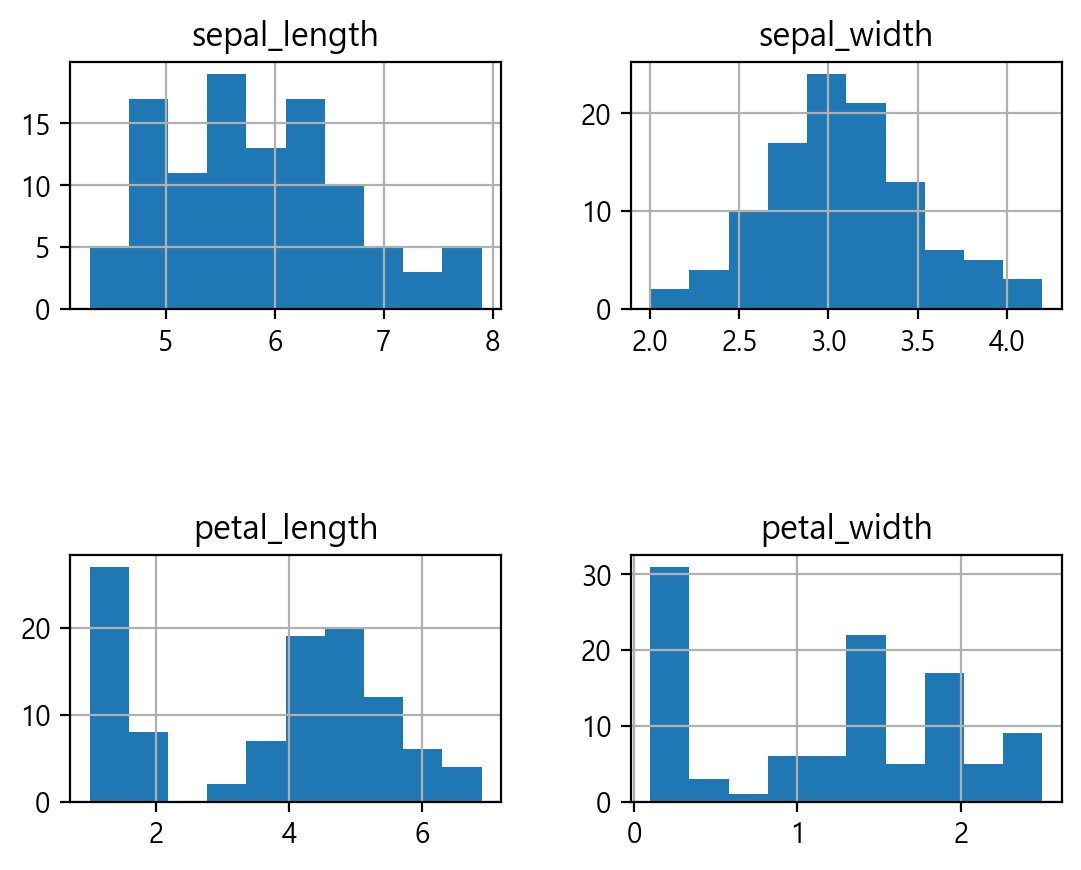

In [24]:
# 훈련 데이터 세트 
# - 히스토 그램 그리기  

pd.DataFrame(x_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

In [25]:
# sklearn.preprocessing.MinMaxScaler() 이용한 최소최대 '0~1' 학습 
# - fit_transform() 함수를 이용해서 훈련 데이터를 학습한다. 

# 훈련 데이터 세트으로 학습  

MinMax_scaler = MinMaxScaler()                           # 최소최대 모델 생성 
iris_MinMax_train = MinMax_scaler.fit_transform(x_train) # 훈련 데이터 학습 
iris_MinMax_train[:10, :]                                # 10개 행을 출력 

array([[0.94444444, 0.45454545, 0.86440678, 0.91666667],
       [0.16666667, 0.72727273, 0.06779661, 0.        ],
       [0.55555556, 0.36363636, 0.69491525, 0.58333333],
       [0.72222222, 0.5       , 0.74576271, 0.83333333],
       [0.52777778, 0.63636364, 0.74576271, 0.91666667],
       [0.33333333, 0.18181818, 0.47457627, 0.41666667],
       [0.55555556, 0.40909091, 0.77966102, 0.70833333],
       [0.41666667, 0.31818182, 0.49152542, 0.45833333],
       [0.72222222, 0.5       , 0.66101695, 0.58333333],
       [0.22222222, 0.77272727, 0.08474576, 0.125     ]])

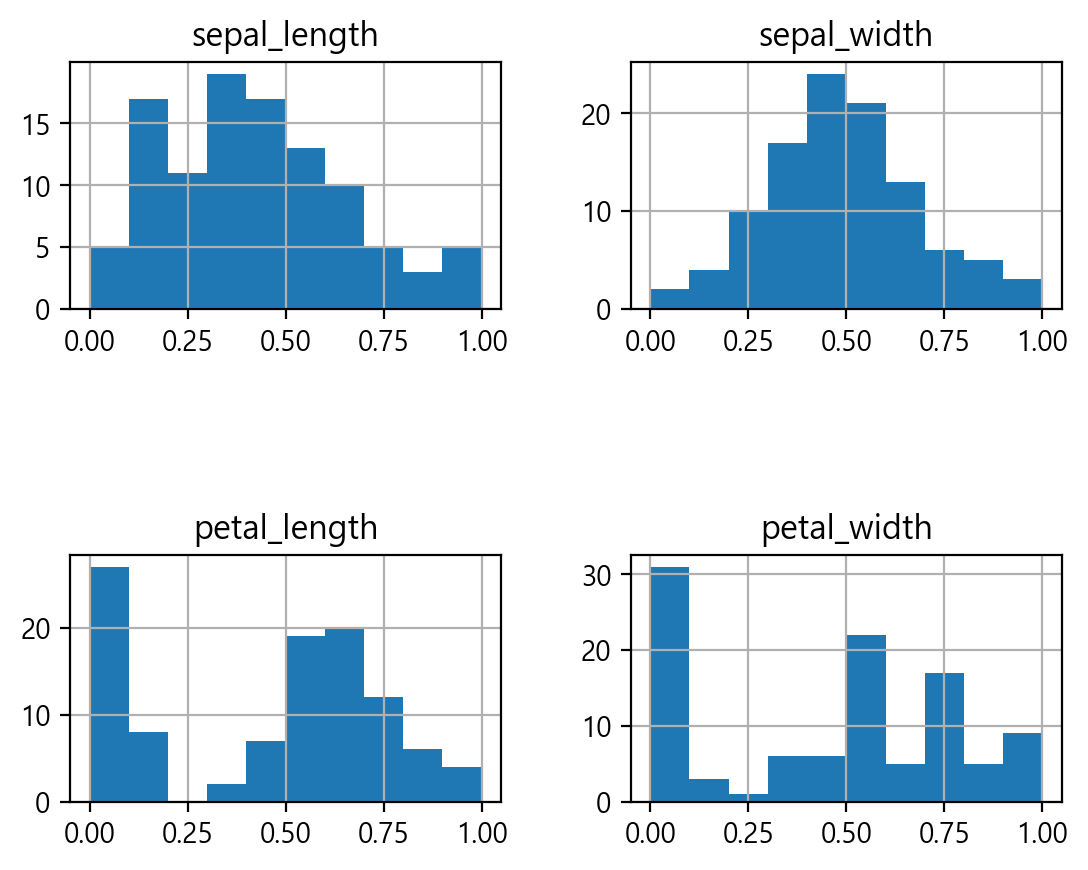

In [26]:
# 최소최대 변환된 훈련 데이터 세트 
# - 히스토 그램 그리기  

pd.DataFrame(iris_MinMax_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

In [27]:
# 변환 전과 변환 후 값 비교하기 
print(x_train[:4])
print('-' * 65)
print(pd.DataFrame(iris_MinMax_train[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
135           7.7          3.0           6.1          2.3
37            4.9          3.6           1.4          0.1
133           6.3          2.8           5.1          1.5
139           6.9          3.1           5.4          2.1
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      0.944444     0.454545      0.864407     0.916667
1      0.166667     0.727273      0.067797     0.000000
2      0.555556     0.363636      0.694915     0.583333
3      0.722222     0.500000      0.745763     0.833333


In [28]:
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_train.min(axis=0), "\n", x_train.max(axis=0), "\n\n", 
      iris_MinMax_train.min(axis=0), "\n", iris_MinMax_train.max(axis=0)) 

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64 
 sepal_length    7.9
sepal_width     4.2
petal_length    6.9
petal_width     2.5
dtype: float64 

 [0. 0. 0. 0.] 
 [1. 1. 1. 1.]


In [29]:
# 시험 데이터 세트에 적용하기  

iris_MinMax_test = MinMax_scaler.transform(x_test)  # 학습된 모델에 시험 데이터를 적용하여 변환시킴 
iris_MinMax_test[:10, :] 

array([[0.66666667, 0.45454545, 0.71186441, 0.91666667],
       [0.69444444, 0.45454545, 0.76271186, 0.83333333],
       [0.55555556, 0.63636364, 0.77966102, 0.95833333],
       [0.02777778, 0.45454545, 0.05084746, 0.04166667],
       [0.55555556, 0.59090909, 0.84745763, 1.        ],
       [0.13888889, 0.5       , 0.10169492, 0.04166667],
       [0.02777778, 0.54545455, 0.05084746, 0.04166667],
       [0.44444444, 0.54545455, 0.6440678 , 0.70833333],
       [0.52777778, 0.09090909, 0.59322034, 0.58333333],
       [0.22222222, 0.59090909, 0.11864407, 0.16666667]])

In [30]:
# 시험 데이터 세트 
# 변환 전과 변환 후 값 비교하기 
print(x_test[:4])
print('-' * 65)
print(pd.DataFrame(iris_MinMax_test[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
145           6.7          3.0           5.2          2.3
112           6.8          3.0           5.5          2.1
136           6.3          3.4           5.6          2.4
38            4.4          3.0           1.3          0.2
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      0.666667     0.454545      0.711864     0.916667
1      0.694444     0.454545      0.762712     0.833333
2      0.555556     0.636364      0.779661     0.958333
3      0.027778     0.454545      0.050847     0.041667


In [31]:
# 시험 데이터 세트 
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_test.min(axis=0), "\n", x_test.max(axis=0), "\n\n", 
      iris_MinMax_test.min(axis=0), "\n", iris_MinMax_test.max(axis=0)) 

sepal_length    4.4
sepal_width     2.2
petal_length    1.3
petal_width     0.1
dtype: float64 
 sepal_length    7.7
sepal_width     4.4
petal_length    6.7
petal_width     2.5
dtype: float64 

 [0.02777778 0.09090909 0.05084746 0.        ] 
 [0.94444444 1.09090909 0.96610169 1.        ]


In [42]:
# 스케일 백 : 정규화된 데이터를 원래의 값으로 변환  
#  - 훈련 데이터를 스케일 백 수행 

real_train = MinMax_scaler.inverse_transform(iris_MinMax_train)
print(real_train[:10, :])
print("-" * 60)
print(x_train[:10])

[[7.7 3.  6.1 2.3]
 [4.9 3.6 1.4 0.1]
 [6.3 2.8 5.1 1.5]
 [6.9 3.1 5.4 2.1]
 [6.2 3.4 5.4 2.3]
 [5.5 2.4 3.8 1.1]
 [6.3 2.9 5.6 1.8]
 [5.8 2.7 3.9 1.2]
 [6.9 3.1 4.9 1.5]
 [5.1 3.7 1.5 0.4]]
------------------------------------------------------------
     sepal_length  sepal_width  petal_length  petal_width
135           7.7          3.0           6.1          2.3
37            4.9          3.6           1.4          0.1
133           6.3          2.8           5.1          1.5
139           6.9          3.1           5.4          2.1
148           6.2          3.4           5.4          2.3
80            5.5          2.4           3.8          1.1
103           6.3          2.9           5.6          1.8
82            5.8          2.7           3.9          1.2
52            6.9          3.1           4.9          1.5
21            5.1          3.7           1.5          0.4


# 표준화(Standardization) with StandardScaler:수치형 변수의 선형변환  

In [43]:
# 아이리스 데이터 세트 읽어오기 

import seaborn as sns

iris = sns.load_dataset("iris")    # iris 데이터셋 읽기  
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
# train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

# 층 구분 변수이름을 지정한 경우 

from sklearn.model_selection import train_test_split

# 데스트 데이터셋 비율 = 30% 
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], 
                                                    iris.species, 
                                                    test_size=0.3, 
                                                    shuffle=True,              # shuffle=True : 무작위 추출
                                                    stratify=iris['species'],  # stratify : 층 구분 변수이름 
                                                    random_state=1234) 
print(x_train.shape, y_train.shape)  # (105, 4) (105,)
print(x_test.shape, y_test.shape)    # 45, 4) (45,)

(105, 4) (105,)
(45, 4) (45,)


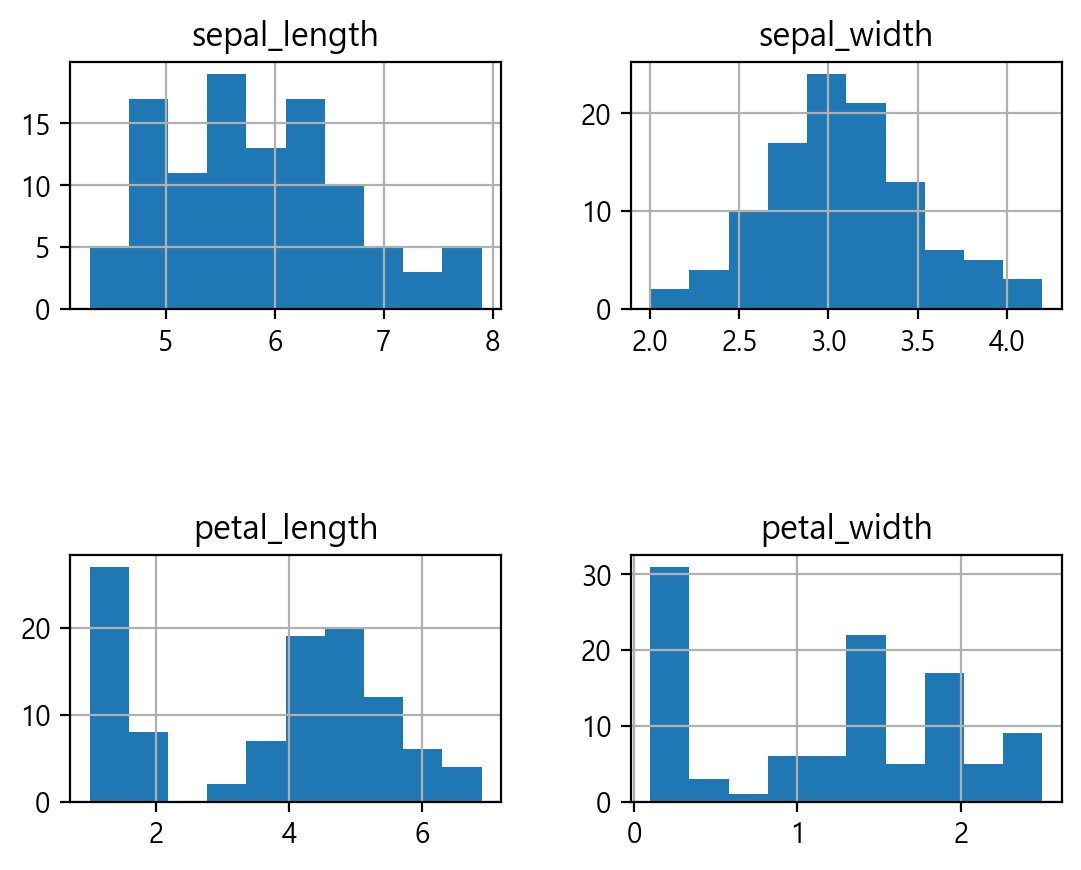

In [45]:
# 훈련 데이터 세트 
# - 히스토 그램 그리기  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

In [46]:
# sklearn.preprocessing.StandardScaler(): 곱셈과 덧셈만으로 변환하는 선형변환을 통해 각 특성의 평균을 0, 분산을 1로 변경
# - fit_transform() 함수를 이용해서 훈련 데이터를 학습한다. 

# 훈련 데이터 세트으로 학습  

from sklearn.preprocessing import StandardScaler

stdS = StandardScaler()                          
iris_stdS_train = stdS.fit_transform(x_train)  # 훈련 데이터 학습 
iris_stdS_train[:10, :]

array([[ 2.26924003, -0.13949466,  1.35923928,  1.49321026],
       [-1.14332554,  1.27795104, -1.33035408, -1.42746349],
       [ 0.56295724, -0.61197655,  0.78698537,  0.43114708],
       [ 1.29422129,  0.09674629,  0.95866155,  1.22769447],
       [ 0.4410799 ,  0.80546914,  0.95866155,  1.49321026],
       [-0.41206149, -1.55694035,  0.04305529, -0.09988451],
       [ 0.56295724, -0.3757356 ,  1.07311233,  0.82942077],
       [-0.04642946, -0.8482175 ,  0.10028068,  0.03287338],
       [ 1.29422129,  0.09674629,  0.67253459,  0.43114708],
       [-0.89957085,  1.51419199, -1.27312869, -1.0291898 ]])

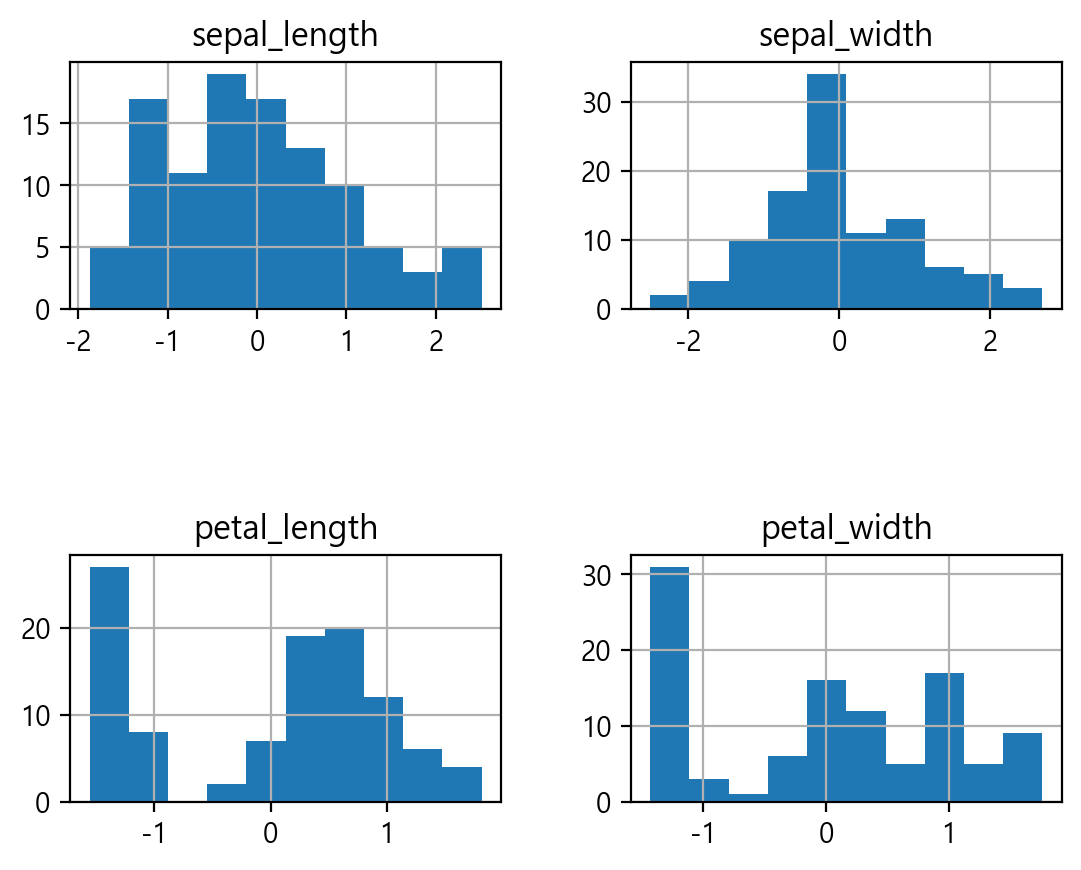

In [47]:
# 변환된 훈련 데이터 세트 
# - 히스토 그램 그리기  

pd.DataFrame(iris_stdS_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

In [48]:
# 변환 전과 변환 후 값 비교하기 
print(x_train[:4])
print('-' * 65)
print(pd.DataFrame(iris_stdS_train[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
135           7.7          3.0           6.1          2.3
37            4.9          3.6           1.4          0.1
133           6.3          2.8           5.1          1.5
139           6.9          3.1           5.4          2.1
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      2.269240    -0.139495      1.359239     1.493210
1     -1.143326     1.277951     -1.330354    -1.427463
2      0.562957    -0.611977      0.786985     0.431147
3      1.294221     0.096746      0.958662     1.227694


In [49]:
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_train.min(axis=0), "\n", x_train.max(axis=0), "\n\n", 
      iris_stdS_train.min(axis=0), "\n", iris_stdS_train.max(axis=0)) 

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64 
 sepal_length    7.9
sepal_width     4.2
petal_length    6.9
petal_width     2.5
dtype: float64 

 [-1.87458959 -2.50190415 -1.55925565 -1.42746349] 
 [2.51299471 2.69539673 1.81704241 1.75872606]


In [50]:
# 시험 데이터 세트에 적용하기  

iris_stdS_test = stdS.transform(x_test)  # 학습된 모델에 시험 데이터를 적용하여 변환시킴 
iris_stdS_test[:10, :] 

array([[ 1.05046661, -0.13949466,  0.84421076,  1.49321026],
       [ 1.17234395, -0.13949466,  1.01588694,  1.22769447],
       [ 0.56295724,  0.80546914,  1.07311233,  1.62596816],
       [-1.75271225, -0.13949466, -1.38757947, -1.2947056 ],
       [ 0.56295724,  0.56922819,  1.30201389,  1.75872606],
       [-1.26520288,  0.09674629, -1.2159033 , -1.2947056 ],
       [-1.75271225,  0.33298724, -1.38757947, -1.2947056 ],
       [ 0.07544788,  0.33298724,  0.6153092 ,  0.82942077],
       [ 0.4410799 , -2.02942225,  0.44363303,  0.43114708],
       [-0.89957085,  0.56922819, -1.15867791, -0.8964319 ]])

In [51]:
# 시험 데이터 세트 
# 변환 전과 변환 후 값 비교하기 
print(x_test[:4])
print('-' * 65)
print(pd.DataFrame(iris_stdS_test[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
145           6.7          3.0           5.2          2.3
112           6.8          3.0           5.5          2.1
136           6.3          3.4           5.6          2.4
38            4.4          3.0           1.3          0.2
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      1.050467    -0.139495      0.844211     1.493210
1      1.172344    -0.139495      1.015887     1.227694
2      0.562957     0.805469      1.073112     1.625968
3     -1.752712    -0.139495     -1.387579    -1.294706


In [52]:
# 시험 데이터 세트 
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_test.min(axis=0), "\n", x_test.max(axis=0), "\n\n", 
      iris_stdS_test.min(axis=0), "\n", iris_stdS_test.max(axis=0)) 

sepal_length    4.4
sepal_width     2.2
petal_length    1.3
petal_width     0.1
dtype: float64 
 sepal_length    7.7
sepal_width     4.4
petal_length    6.7
petal_width     2.5
dtype: float64 

 [-1.75271225 -2.02942225 -1.38757947 -1.42746349] 
 [2.26924003 3.16787863 1.70259162 1.75872606]


# Robust Scaling with StandardScaler:수치형 변수의 선형변환

In [53]:
# 아이리스 데이터 세트 읽어오기 

import seaborn as sns

iris = sns.load_dataset("iris")    # iris 데이터셋 읽기  
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
# train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

# 층 구분 변수이름을 지정한 경우 

from sklearn.model_selection import train_test_split

# 데스트 데이터셋 비율 = 30% 
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], 
                                                    iris.species, 
                                                    test_size=0.3, 
                                                    shuffle=True,              # shuffle=True : 무작위 추출
                                                    stratify=iris['species'],  # stratify : 층 구분 변수이름 
                                                    random_state=1234) 
print(x_train.shape, y_train.shape)  # (105, 4) (105,)
print(x_test.shape, y_test.shape)    # 45, 4) (45,)

(105, 4) (105,)
(45, 4) (45,)


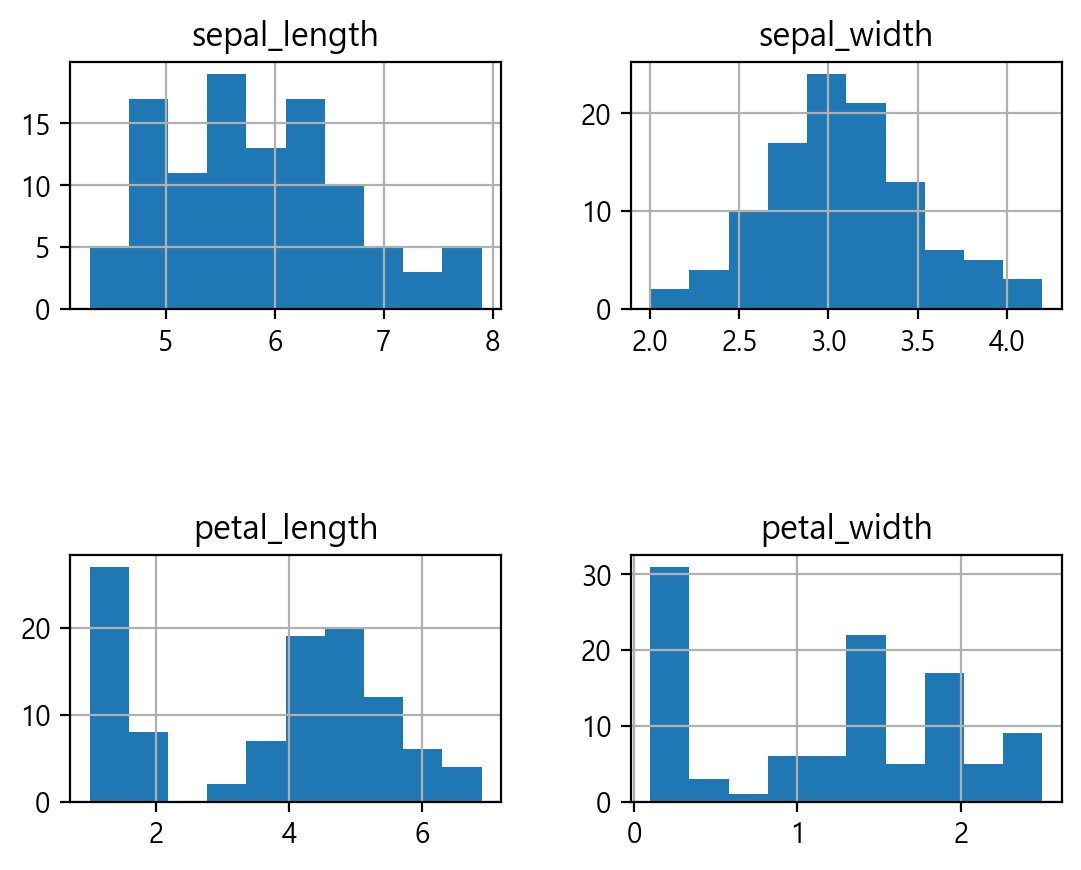

In [55]:
# 훈련 데이터 세트 
# - 히스토 그램 그리기  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

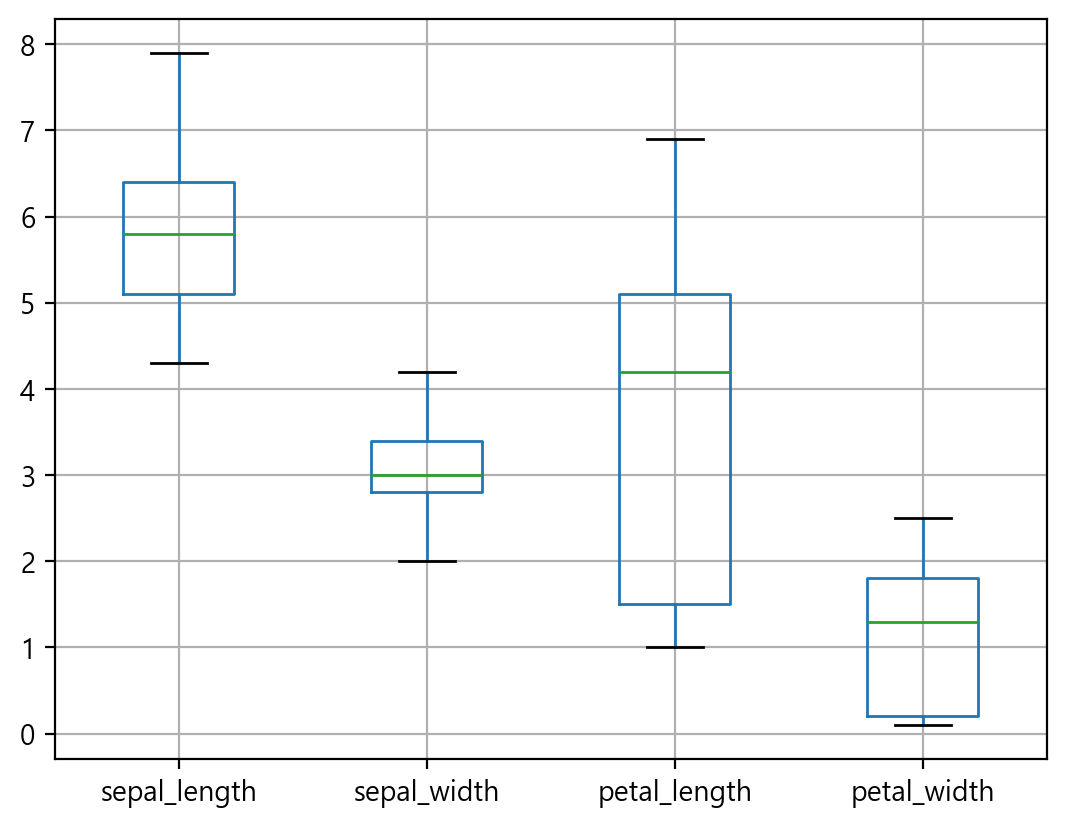

In [56]:
# 훈련 데이터 세트 
# - 상자그림 그리기  

pd.DataFrame(x_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).boxplot()  
plt.subplots_adjust(hspace=1)
plt.show()

In [57]:
# sklearn.preprocessing.RobustScaler(): 
# - 특성들이 같은 스케일을 같게 된다는 통계적 측면에서는 표준화와 비슷하지만 평균과 분산 대신 중앙값(median)과 사분위수(quantile) 사용
# - fit_transform() 함수를 이용해서 훈련 데이터를 학습한다. 

# 훈련 데이터 세트으로 학습  

from sklearn.preprocessing import RobustScaler

robS = RobustScaler()                        
iris_robS_train = robS.fit_transform(x_train)  # 훈련 데이터 학습 
iris_robS_train[:10, :]

array([[ 1.46153846,  0.        ,  0.52777778,  0.625     ],
       [-0.69230769,  1.        , -0.77777778, -0.75      ],
       [ 0.38461538, -0.33333333,  0.25      ,  0.125     ],
       [ 0.84615385,  0.16666667,  0.33333333,  0.5       ],
       [ 0.30769231,  0.66666667,  0.33333333,  0.625     ],
       [-0.23076923, -1.        , -0.11111111, -0.125     ],
       [ 0.38461538, -0.16666667,  0.38888889,  0.3125    ],
       [ 0.        , -0.5       , -0.08333333, -0.0625    ],
       [ 0.84615385,  0.16666667,  0.19444444,  0.125     ],
       [-0.53846154,  1.16666667, -0.75      , -0.5625    ]])

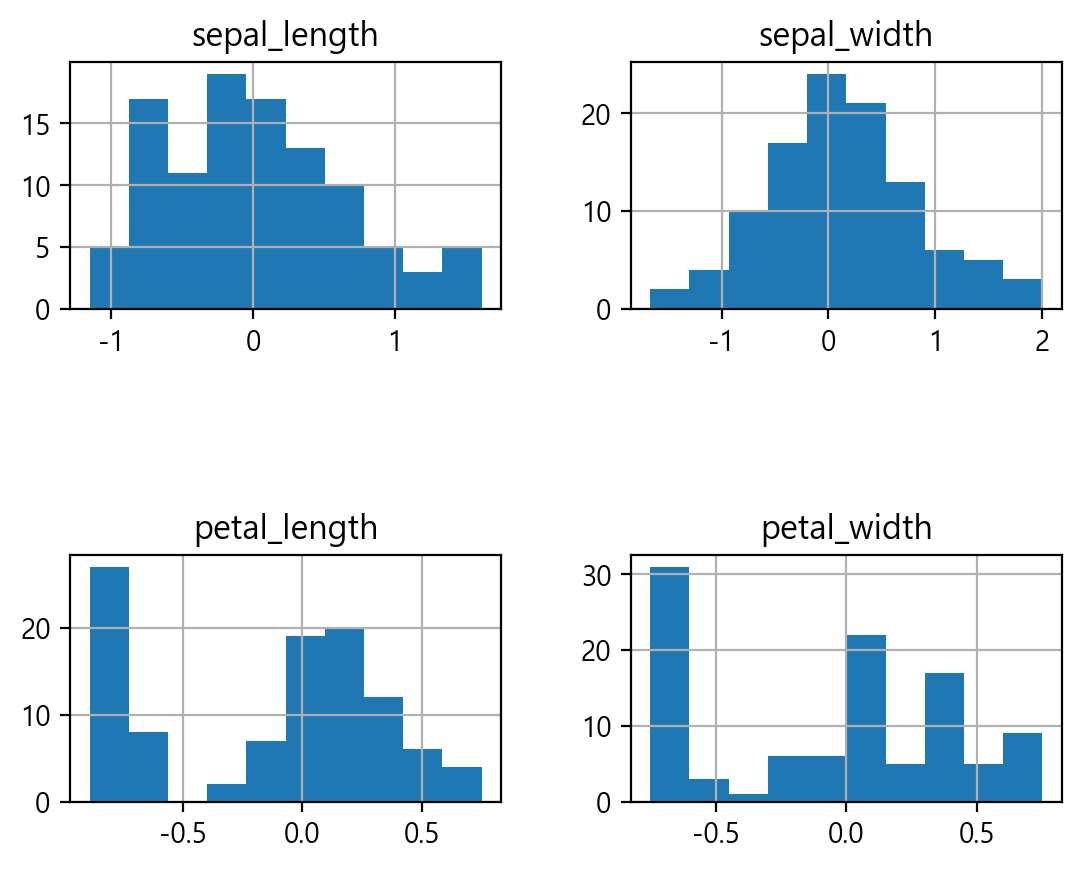

In [58]:
# 변환된 훈련 데이터 세트 
# - 히스토 그램 그리기  

pd.DataFrame(iris_robS_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

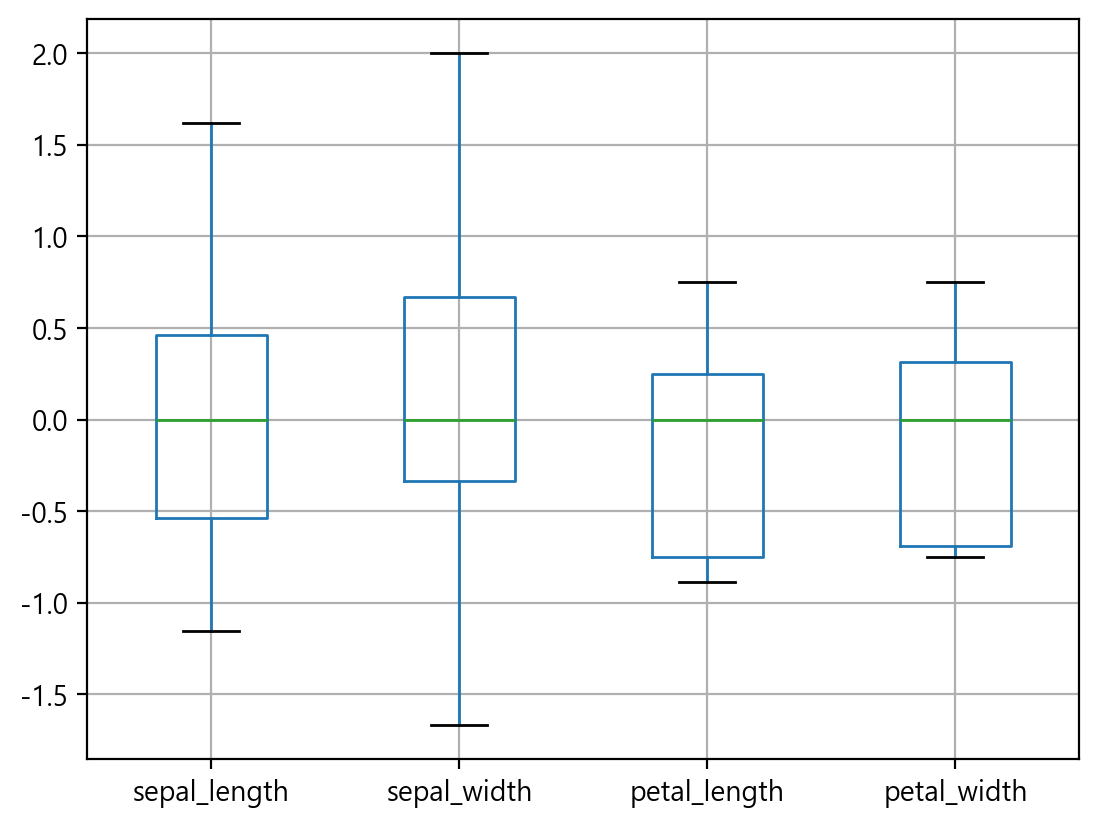

In [59]:
# 변환된 훈련 데이터 세트 
# - 상자그림 그리기  

pd.DataFrame(iris_robS_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).boxplot()  
plt.subplots_adjust(hspace=1)
plt.show()

In [60]:
# 변환 전과 변환 후 값 비교하기 
print(x_train[:4])
print('-' * 65)
print(pd.DataFrame(iris_robS_train[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
135           7.7          3.0           6.1          2.3
37            4.9          3.6           1.4          0.1
133           6.3          2.8           5.1          1.5
139           6.9          3.1           5.4          2.1
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      1.461538     0.000000      0.527778        0.625
1     -0.692308     1.000000     -0.777778       -0.750
2      0.384615    -0.333333      0.250000        0.125
3      0.846154     0.166667      0.333333        0.500


In [61]:
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_train.min(axis=0), "\n", x_train.max(axis=0), "\n\n", 
      iris_robS_train.min(axis=0), "\n", iris_robS_train.max(axis=0)) 

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64 
 sepal_length    7.9
sepal_width     4.2
petal_length    6.9
petal_width     2.5
dtype: float64 

 [-1.15384615 -1.66666667 -0.88888889 -0.75      ] 
 [1.61538462 2.         0.75       0.75      ]


In [62]:
# 시험 데이터 세트에 적용하기  

iris_robS_test = robS.transform(x_test)  # 학습된 모델에 시험 데이터를 적용하여 변환시킴 
iris_robS_test[:10, :] 

array([[ 0.69230769,  0.        ,  0.27777778,  0.625     ],
       [ 0.76923077,  0.        ,  0.36111111,  0.5       ],
       [ 0.38461538,  0.66666667,  0.38888889,  0.6875    ],
       [-1.07692308,  0.        , -0.80555556, -0.6875    ],
       [ 0.38461538,  0.5       ,  0.5       ,  0.75      ],
       [-0.76923077,  0.16666667, -0.72222222, -0.6875    ],
       [-1.07692308,  0.33333333, -0.80555556, -0.6875    ],
       [ 0.07692308,  0.33333333,  0.16666667,  0.3125    ],
       [ 0.30769231, -1.33333333,  0.08333333,  0.125     ],
       [-0.53846154,  0.5       , -0.69444444, -0.5       ]])

In [63]:
# 시험 데이터 세트 
# 변환 전과 변환 후 값 비교하기 
print(x_test[:4])
print('-' * 65)
print(pd.DataFrame(iris_robS_test[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
145           6.7          3.0           5.2          2.3
112           6.8          3.0           5.5          2.1
136           6.3          3.4           5.6          2.4
38            4.4          3.0           1.3          0.2
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      0.692308     0.000000      0.277778       0.6250
1      0.769231     0.000000      0.361111       0.5000
2      0.384615     0.666667      0.388889       0.6875
3     -1.076923     0.000000     -0.805556      -0.6875


In [64]:
# 시험 데이터 세트 
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_test.min(axis=0), "\n", x_test.max(axis=0), "\n\n", 
      iris_robS_test.min(axis=0), "\n", iris_robS_test.max(axis=0)) 

sepal_length    4.4
sepal_width     2.2
petal_length    1.3
petal_width     0.1
dtype: float64 
 sepal_length    7.7
sepal_width     4.4
petal_length    6.7
petal_width     2.5
dtype: float64 

 [-1.07692308 -1.33333333 -0.80555556 -0.75      ] 
 [1.46153846 2.33333333 0.69444444 0.75      ]


# 균등,정규분포(RankGauss) with QuantileTransformer: 수치형 변수의 선형변환

In [65]:
# 아이리스 데이터 세트 읽어오기 

import seaborn as sns

iris = sns.load_dataset("iris")    # iris 데이터셋 읽기  
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [66]:
# train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

# 층 구분 변수이름을 지정한 경우 

from sklearn.model_selection import train_test_split

# 데스트 데이터셋 비율 = 30% 
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], 
                                                    iris.species, 
                                                    test_size=0.3, 
                                                    shuffle=True,              # shuffle=True : 무작위 추출
                                                    stratify=iris['species'],  # stratify : 층 구분 변수이름 
                                                    random_state=1234) 
print(x_train.shape, y_train.shape)  # (105, 4) (105,)
print(x_test.shape, y_test.shape)    # 45, 4) (45,)

(105, 4) (105,)
(45, 4) (45,)


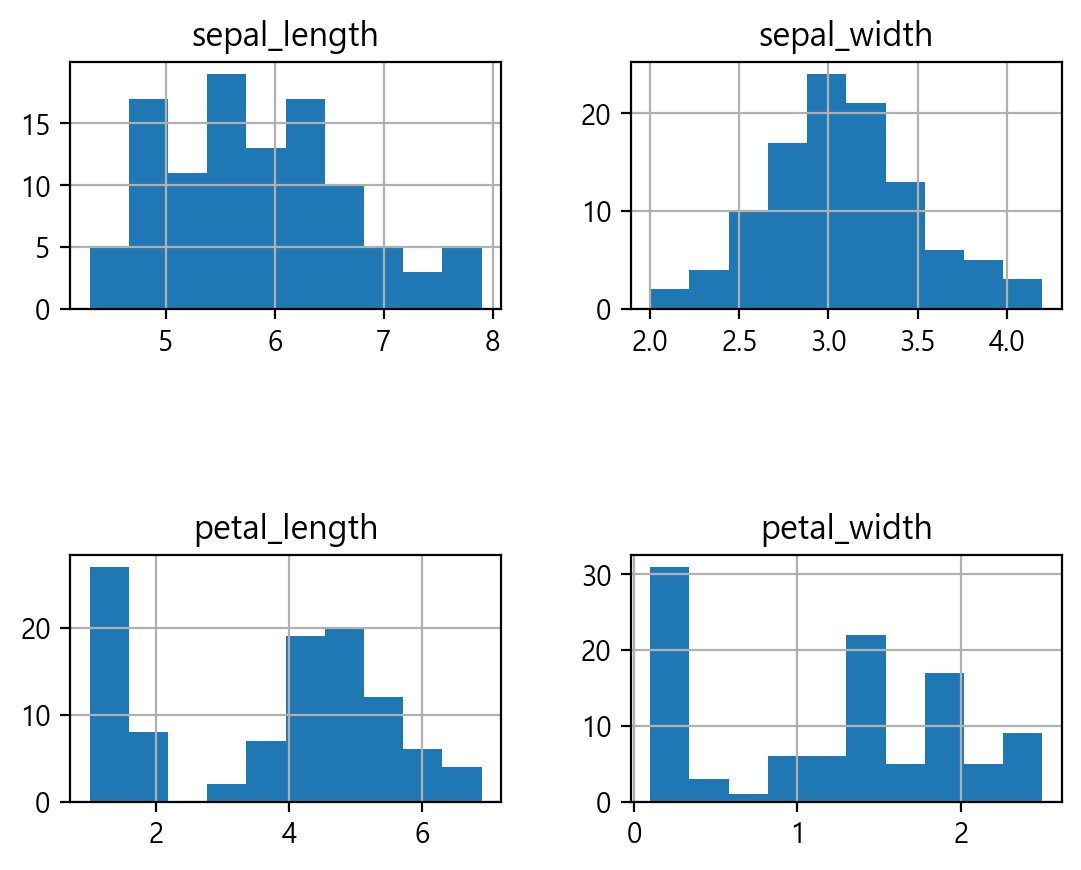

In [67]:
# 훈련 데이터 세트 
# - 히스토 그램 그리기  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

In [69]:
# sklearn.preprocessing.QuantileTransformer(): 
# - Scikit Learn의 QuantileTransformer로 균등분포와 정규분포로의 선형변환이 가능
# - fit_transform() 함수를 이용해서 훈련 데이터를 학습한다. 

# 훈련 데이터 세트으로 학습  

from sklearn.preprocessing import QuantileTransformer

qtS = QuantileTransformer(output_distribution='uniform', n_quantiles=60)  # 분위수의 기본갑은 1000  
iris_qtS_train = qtS.fit_transform(x_train)                               # 훈련 데이터 학습 
iris_qtS_train[:10, :]

array([[0.98305085, 0.46610169, 0.95092025, 0.94915254],
       [0.11016949, 0.88135593, 0.10169492, 0.        ],
       [0.70338983, 0.27966102, 0.76271186, 0.62711864],
       [0.89830508, 0.59322034, 0.83050847, 0.88983051],
       [0.66666667, 0.78813559, 0.83050847, 0.94915254],
       [0.37288136, 0.04444444, 0.39515175, 0.4       ],
       [0.70338983, 0.3559322 , 0.88135593, 0.73728814],
       [0.52542373, 0.19491525, 0.40677966, 0.43220339],
       [0.89830508, 0.59322034, 0.6779661 , 0.62711864],
       [0.23728814, 0.91525424, 0.20338983, 0.30508475]])

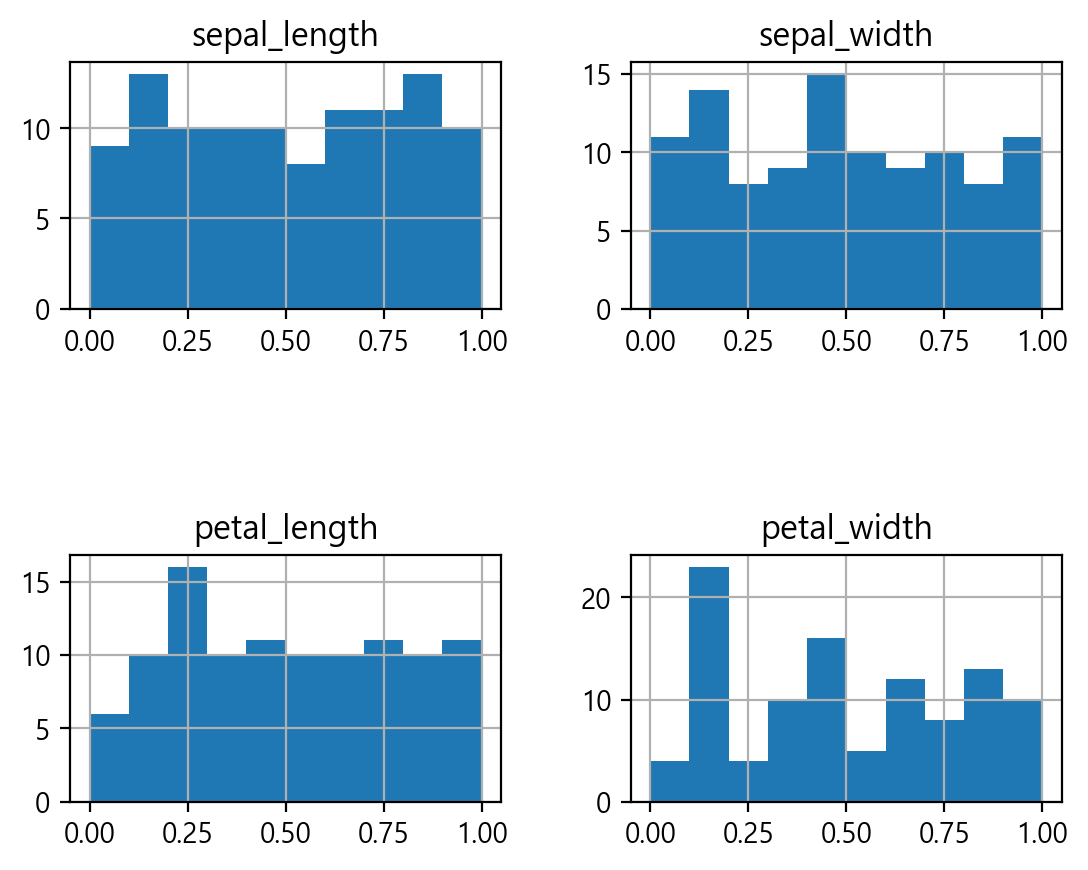

In [70]:
# 변환된 훈련 데이터 세트 
# - 히스토 그램 그리기  

pd.DataFrame(iris_qtS_train, columns=['sepal_length','sepal_width','petal_length','petal_width']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

In [71]:
# 변환 전과 변환 후 값 비교하기 
print(x_train[:4])
print('-' * 65)
print(pd.DataFrame(iris_qtS_train[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
135           7.7          3.0           6.1          2.3
37            4.9          3.6           1.4          0.1
133           6.3          2.8           5.1          1.5
139           6.9          3.1           5.4          2.1
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      0.983051     0.466102      0.950920     0.949153
1      0.110169     0.881356      0.101695     0.000000
2      0.703390     0.279661      0.762712     0.627119
3      0.898305     0.593220      0.830508     0.889831


In [72]:
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_train.min(axis=0), "\n", x_train.max(axis=0), "\n\n", 
      iris_qtS_train.min(axis=0), "\n", iris_qtS_train.max(axis=0)) 

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64 
 sepal_length    7.9
sepal_width     4.2
petal_length    6.9
petal_width     2.5
dtype: float64 

 [0. 0. 0. 0.] 
 [1. 1. 1. 1.]


In [73]:
# 시험 데이터 세트에 적용하기  

iris_qtS_test = qtS.transform(x_test)  # 학습된 모델에 시험 데이터를 적용하여 변환시킴 
iris_qtS_test[:10, :] 

array([[0.84745763, 0.46610169, 0.79885344, 0.94915254],
       [0.87461086, 0.46610169, 0.84745763, 0.88983051],
       [0.70338983, 0.78813559, 0.88135593, 0.98305085],
       [0.00671141, 0.46610169, 0.04444444, 0.1440678 ],
       [0.70338983, 0.73333333, 0.94210438, 1.        ],
       [0.06779661, 0.59322034, 0.27966102, 0.1440678 ],
       [0.00671141, 0.68644068, 0.04444444, 0.1440678 ],
       [0.56730769, 0.68644068, 0.65377653, 0.73728814],
       [0.66666667, 0.01226994, 0.57627119, 0.62711864],
       [0.23728814, 0.73333333, 0.30874943, 0.32209116]])

In [74]:
# 시험 데이터 세트 
# 변환 전과 변환 후 값 비교하기 
print(x_test[:4])
print('-' * 65)
print(pd.DataFrame(iris_qtS_test[:4], columns=['sepal_length','sepal_width','petal_length','petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
145           6.7          3.0           5.2          2.3
112           6.8          3.0           5.5          2.1
136           6.3          3.4           5.6          2.4
38            4.4          3.0           1.3          0.2
-----------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0      0.847458     0.466102      0.798853     0.949153
1      0.874611     0.466102      0.847458     0.889831
2      0.703390     0.788136      0.881356     0.983051
3      0.006711     0.466102      0.044444     0.144068


In [75]:
# 시험 데이터 세트 
# 스케일링 전 각 열의 minmax vs 스케일링 후 각 열의 minmax   

print(x_test.min(axis=0), "\n", x_test.max(axis=0), "\n\n", 
      iris_qtS_test.min(axis=0), "\n", iris_qtS_test.max(axis=0)) 

sepal_length    4.4
sepal_width     2.2
petal_length    1.3
petal_width     0.1
dtype: float64 
 sepal_length    7.7
sepal_width     4.4
petal_length    6.7
petal_width     2.5
dtype: float64 

 [0.00671141 0.01226994 0.04444444 0.        ] 
 [0.98305085 1.         0.98773006 1.        ]
